# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


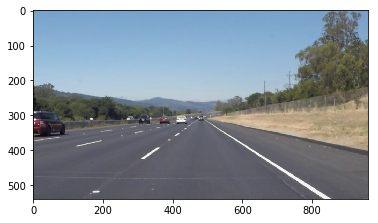

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

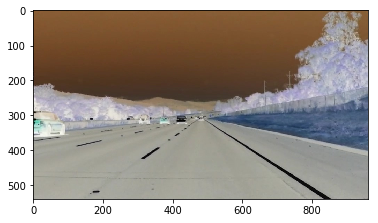

In [3]:
# Play with contrast
def sigmoid(z):
    return (1+np.exp(-z))**-1


# image_adj = 255 * sigmoid(image) # fails
#image_adj = image -100 # succeeds
image_adj = 255-(image) # succeeds
# image_adj = np.exp(image)
plt.imshow(image_adj)

/home/jesse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


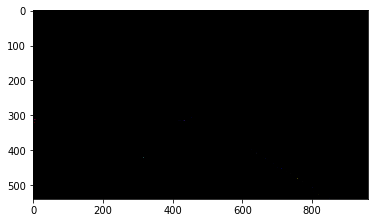

In [4]:
img = np.zeros([50,50,3])

img[:,:,0] = np.ones([50,50])*64/255.0
img[:,:,1] = np.ones([50,50])*128/255.0
img[:,:,2] = np.ones([50,50])*192/255.0

#plt.imshow(img)

img_1 = 255 * sigmoid(img)
plt.imshow(img_1)

#plt.imshow(float(sigmoid(image)))

#cv2.imwrite('color_img.jpg', img)
#cv2.imshow("image", img);
#cv2.waitKey();

#image.shape
#image.dtype
#plt.imshow(np.exp(255/image)) # succeeds
#test = (np.exp(-image/100-155))*255; plt.imshow(test) # succeeds
test = 255*sigmoid(image) # succeeds
test = test.astype(np.uint8)
plt.imshow(test) # succeeds
#plt.imshow(255*sigmoid(image)) # fails

## Ideas for Lane Detection Pipeline

In [47]:
np.max(sigmoid(image))

/home/jesse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.2688

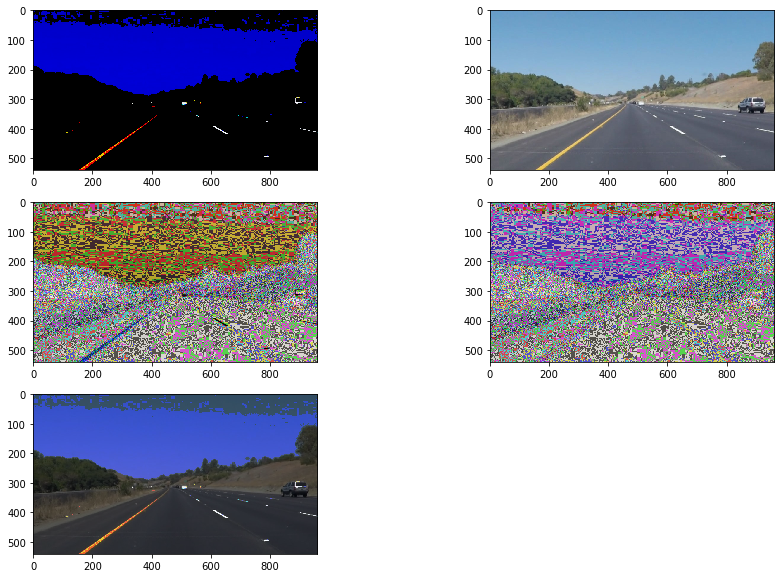

In [101]:
image_ = mpimg.imread('test_images/'+str(images[0]))
test = image_ * (image>200)
fig = plt.figure(figsize=(15,10))

a = fig.add_subplot(3,2,1)
plt.imshow(test)

a = fig.add_subplot(3,2,2)
plt.imshow(image_)

a = fig.add_subplot(3,2,3)
plt.imshow(np.mean(np.array([test,image_]),axis=0))

a = fig.add_subplot(3,2,4)
plt.imshow((test+image_)/2)

a = fig.add_subplot(3,2,5)
plt.imshow( np.array(np.median(np.array([test,image_]), axis=0 )).astype(np.uint8)     ) 

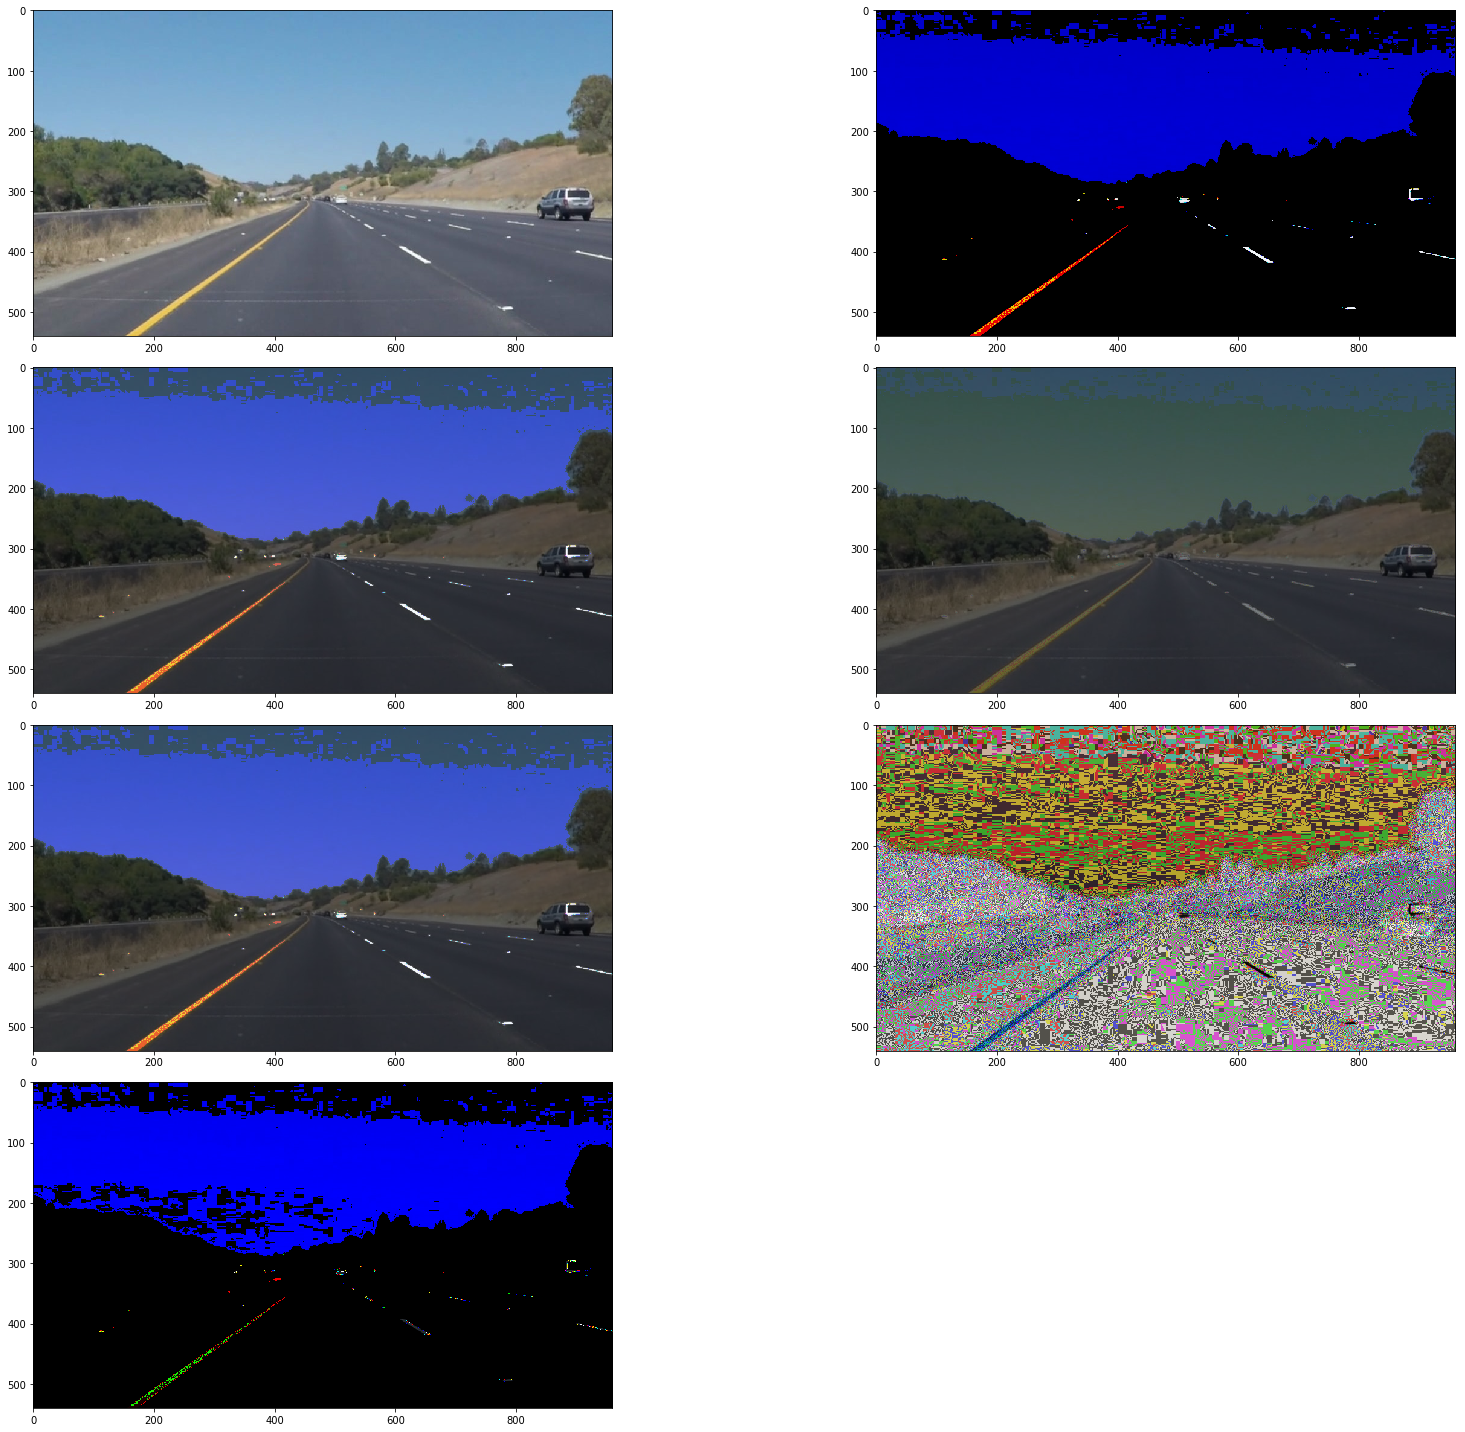

In [135]:
# Darkening experiments

for i in range(1):
    fig = plt.figure(figsize=(25,20))

    # 1 Original
    a = fig.add_subplot(4,2,1)
    image_ = mpimg.imread('test_images/'+str(images[i]))
    plt.imshow(image_)

    # 2 Dark filter
    a = fig.add_subplot(4,2,2)
    filt = (image_ * (image>200)).astype(np.uint8)
    plt.imshow(filt)

    # 3 Mean, good type
    a = fig.add_subplot(4,2,3)
    av_1 = np.mean(np.array([test,image_]),axis=0).astype(np.uint8) 
    plt.imshow(np.array( av_1 ))

    # 4 Mean without dtype - pretty but weird
    a = fig.add_subplot(4,2,4)
    av_2 = ((test+image_)/2).astype(np.uint8)
    plt.imshow(av_2)

    # 5 Median, good type
    a = fig.add_subplot(4,2,5)
    av_3 = (np.median(np.array([test,image_]), axis=0 ))
    plt.imshow( av_3.astype(np.uint8)     ) 
    
    # 6 Median without dtype
    a = fig.add_subplot(4,2,6)
    plt.imshow(av_3) # nonsense - needs datatype
    
    # 7 Increase contrast
    a = fig.add_subplot(4,2,7)
    bright = filt * 1.2
    plt.imshow(bright.astype(np.uint8))
    
    # 8 Exaggerate bright
    #a = fig.add_subplot(4,2,7)
    #bw = (image_>200).astype(np.uint8)
    #plt.imshow(bw)
    
    plt.tight_layout()
    

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [5]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines) # draw_lines(line_img, lines)----------------------------------------------
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [6]:
import os
os.listdir("test_images/")

['solidYellowCurve.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowLeft.jpg',
 'solidYellowCurve2.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

## Solution: Helper Functions

In [7]:
# Helper function modified for extrapolation
def draw_lines_1(img, lines, color=[255, 0, 0], thickness=12):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    """
    
    left_grads = []
    left_Cs = []
    right_grads = []
    right_Cs = []
    
    for line in lines:
        # get m and c as in y=mx+c
        for x1,y1,x2,y2 in line:
            if x2==x1: # prevent NANs (divide by zero)
                pass
            else:
                # length = ((x1-x2)**2+(y1-y2)**2)**0.5
                grad = (y2-y1)/(x2-x1)
                C    = y1 - grad * x1
                
                #f length > 50:# ignore noise ### ??made obsolete by choice of average??
                # this conditional results in NANs for some reason

                # store grad and y-int according to left or right lane line
                # left lane - NB: y increases going DOWN image, but x as usual, so negative
                if grad < -0.3 and grad > -1.8: # remove outliers (+0.3<m<1.8)
                    left_grads.append(grad)
                    left_Cs.append(C)
                elif grad > 0.2 and grad < 1.8:
                    right_grads.append(grad)
                    right_Cs.append(C)

    # Find median c and m (median because robust to outliers ie screen reflection etc)
    # Actually, mean works better. Don't know why.
    m_left = np.median(left_grads)
    c_left = np.median(left_Cs)
    m_right = np.median(right_grads)
    c_right = np.median(right_Cs)
    
    # 540 down by 960 along;
    # Extrapolate left with exceptions   
    try:
        y_1 = 540
        x_1 = int((y_1-c_left)/(m_left)) # to prevent nan error see below too
    except:
        print("here 1 ", m_left, c_left)
        x_1 = 10
        y_1 = int(m_left * x_1 + c_left)
    try:
        y_2 = 320 
        x_2 = int((y_2-c_left)/(m_left))
    except:
        print("here 2 ", m_left, c_left)
        x_2 = 480 - 10
        y_2 = int(m_left * x_2 + c_left)
    cv2.line(img, (x_1, y_1), (x_2, y_2), color, thickness)
    
    # Extrapolate right with debugging  
    try:
        y_1 = 540
        x_1 = int((y_1-c_right)/(m_right)) 
    except:
        print("here 3 ", m_right, c_right)
        x_1 = 960 - 10
        y_1 = int(m_right * x_1 + c_right) # common break point if high Hough threshold
    try:
        y_2 = 320 ## soft-code here and above
        x_2 = int((y_2-c_right)/(m_right))
    except:
        print("here 4 ", m_right, c_right)
        x_2 = 480 + 10
        y_2 = int(m_right * x_2 + c_right)
    cv2.line(img, (x_1, y_1), (x_2, y_2), color, thickness)
    
def hough_lines_1(img, rho, theta, threshold, min_line_len, max_line_gap): # modified to call modified draw_lines()

    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines_1(line_img, lines) # draw_lines(line_img, lines)----------------------------------------------
    return line_img

def darken(img, threshold=200, average=False):
    '''
    Keeps only pixels whose value exceeds threshold; in average=True, imposes less stringent condition by 
    combining filtered pixel values with input values. NB doesn't use 'lightness', just 3-channel raw values.
    NB too high a threshold and Hough outputs too few lines resulting in Nans; too low and model finds 
    irrelevant lines. Averaging has a similar effect to lowering threshold.
    '''
    dark = img * (img > threshold)
    if average:
        dark = np.median(np.array([img, dark]), axis=0)
    dark = np.asarray(dark).astype(np.uint8)
    return dark

## Solution: Pipeline

In [33]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

def find_lanes(img, plots= False):
    
    if plots==True:

        # Prep plots
        fig = plt.figure(figsize=(15,10))

        # Plot original
        a = fig.add_subplot(3,3,1)
        plt.imshow(img)
        a.set_title('original')
    
    # 1 Grayscale
    out_1 = grayscale(img)
    gray = out_1
    if plots==True:
        a = fig.add_subplot(3,3,2)
        plt.imshow(gray, cmap='gray')
        a.set_title('gray')
        
    # 1.1 Darken
    out_1_1 = darken(out_1, threshold=200, average=True)
    if plots==True:
        a = fig.add_subplot(3,3,3)
        plt.imshow(out_1_1)
        a.set_title('darken')
        
    # 2 Gaussian blur
    kernel_size = 3 # Odd
    out_2 = gaussian_blur(out_1_1, kernel_size)
    if plots==True:
        a = fig.add_subplot(3,3,4)
        plt.imshow(out_2)
        a.set_title('blur')
        
    # 3 Canny transform
    low_threshold, high_threshold = (60,150)
    out_3 = canny(out_2, low_threshold, high_threshold)
    edges = out_2
    if plots==True:
        a = fig.add_subplot(3,3,5)
        plt.imshow(out_3)
        a.set_title('Canny')

    # 4 Select region of interest
    imshape = image.shape
    vertices = np.array([[(imshape[1]*0.09,imshape[0]),
                        (imshape[1]*0.49, imshape[0]/2*1.14), 
                        (imshape[1]*0.51, imshape[0]/2*1.14),
                        (imshape[1]*0.91,imshape[0])]], 
                        dtype=np.int32)
    out_4 = region_of_interest(out_3, vertices)
    masked_edges = out_4
    if plots==True:
        a = fig.add_subplot(3,3,6)
        plt.imshow(out_4)
        a.set_title('mask')
    
    # 5 Hough lines
    
    try:
        rho, theta, threshold = (1, np.pi/180, 100) # (1, np.pi/180, 1) 100 works but generates nans, 10 good both
        min_line_length, max_line_gap = (5, 1)  # (5,1)
        out_5 = hough_lines_1(out_4, rho, theta, threshold, min_line_length, max_line_gap)
    except:
        try:
            rho, theta, threshold = (1, np.pi/180, 30) # (1, np.pi/180, 1) 100 works but generates nans, 10 good both
            min_line_length, max_line_gap = (5, 1)  # (5,1)
            out_5 = hough_lines_1(out_4, rho, theta, threshold, min_line_length, max_line_gap)
        except:
            rho, theta, threshold = (1, np.pi/180, 10) # 1 for median=False?
            min_line_length, max_line_gap = (5, 1)  # (5,1)
            out_5 = hough_lines_1(out_4, rho, theta, threshold, min_line_length, max_line_gap)            
    if plots==True:
        a = fig.add_subplot(3,3,7)
        plt.imshow(out_5)
        a.set_title('Hough')
    
    # 6 Add to original
    out_6 = weighted_img(out_5, img, 0.8, 1, 0)
    if plots==True:
        a = fig.add_subplot(3,3,8)
        plt.imshow(out_6)
        a.set_title('output')

    # Adjust plots
    plt.tight_layout()
        
    return out_6    # needed for video but not for stills

array([[[ 88, 127, 162],
        [ 88, 127, 162],
        [ 88, 127, 162],
        ..., 
        [ 81, 124, 161],
        [ 80, 123, 160],
        [ 75, 118, 155]],

       [[ 88, 127, 162],
        [ 88, 127, 162],
        [ 88, 127, 162],
        ..., 
        [ 81, 124, 161],
        [ 80, 123, 160],
        [ 75, 118, 155]],

       [[ 88, 127, 162],
        [ 88, 127, 162],
        [ 88, 127, 162],
        ..., 
        [ 81, 124, 161],
        [ 80, 123, 160],
        [ 75, 118, 155]],

       ..., 
       [[ 76,  80,  85],
        [ 75,  79,  84],
        [ 75,  79,  84],
        ..., 
        [ 67,  70,  82],
        [ 66,  68,  80],
        [ 63,  66,  78]],

       [[ 75,  79,  84],
        [ 75,  79,  84],
        [ 74,  78,  83],
        ..., 
        [ 67,  70,  80],
        [ 66,  69,  78],
        [ 62,  66,  75]],

       [[ 72,  78,  82],
        [ 71,  77,  82],
        [ 71,  77,  82],
        ..., 
        [ 66,  70,  79],
        [ 65,  68,  78],
        [ 62,  66,

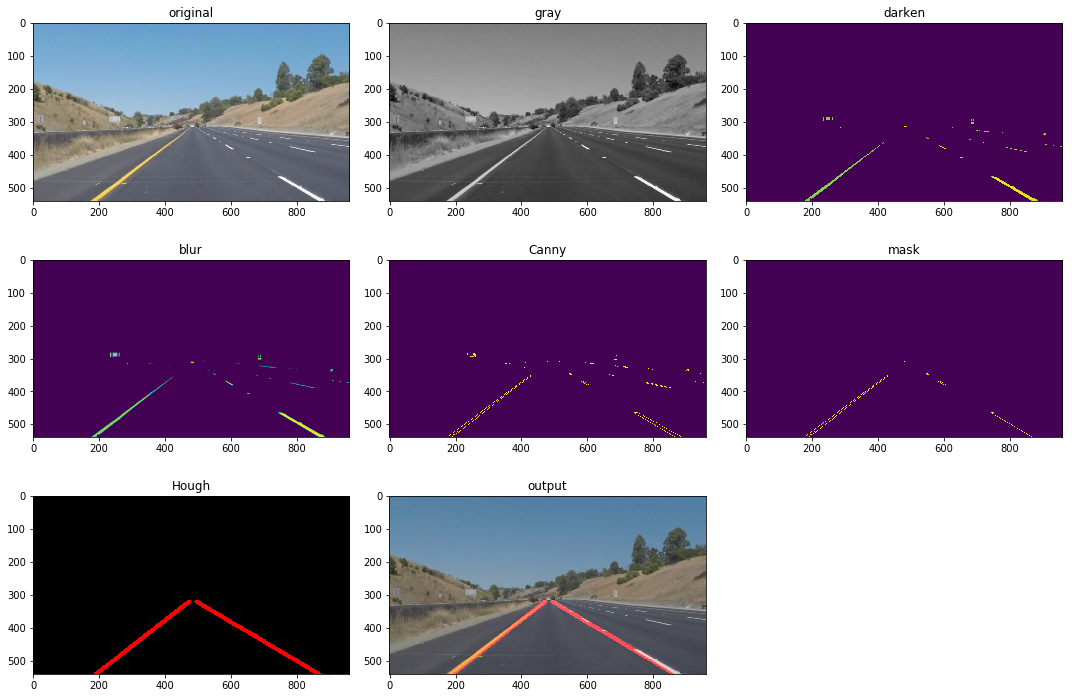

In [30]:
# test_image = image = mpimg.imread('test_images/solidWhiteRight.jpg')
images = os.listdir("test_images/")
test_image = mpimg.imread('test_images/'+str(images[1]))
find_lanes(test_image, plots=True)

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [12]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    result = find_lanes(image)
    #result = image
    return result

Let's try the one with the solid white lane on the right first ...

In [13]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds

##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")

white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


  3%|▎         | 6/222 [00:00<00:10, 20.75it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


  6%|▋         | 14/222 [00:00<00:09, 20.80it/s]

here 1  nan nan


  9%|▉         | 20/222 [00:00<00:09, 20.85it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 12%|█▏        | 26/222 [00:01<00:09, 21.35it/s]

here 1  nan nan


 13%|█▎        | 29/222 [00:01<00:09, 21.00it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 16%|█▌        | 35/222 [00:01<00:09, 20.23it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 20%|█▉        | 44/222 [00:02<00:08, 20.66it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 22%|██▏       | 49/222 [00:02<00:09, 17.70it/s]

here 1  nan nan
here 1  nan nan


 25%|██▍       | 55/222 [00:02<00:10, 15.76it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 27%|██▋       | 59/222 [00:03<00:10, 15.40it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 30%|███       | 67/222 [00:03<00:09, 16.32it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 32%|███▏      | 71/222 [00:03<00:09, 15.97it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 36%|███▌      | 79/222 [00:04<00:09, 14.88it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 36%|███▋      | 81/222 [00:04<00:09, 14.78it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 41%|████      | 91/222 [00:05<00:08, 15.83it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 43%|████▎     | 95/222 [00:05<00:08, 15.61it/s]

here 1  nan nan
here 1  nan nan


 46%|████▋     | 103/222 [00:05<00:07, 15.95it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 48%|████▊     | 107/222 [00:06<00:07, 15.04it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 52%|█████▏    | 115/222 [00:06<00:07, 14.84it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 54%|█████▎    | 119/222 [00:07<00:07, 14.52it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 57%|█████▋    | 127/222 [00:07<00:05, 17.32it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 59%|█████▉    | 131/222 [00:07<00:05, 16.84it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 63%|██████▎   | 139/222 [00:08<00:05, 16.12it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 64%|██████▍   | 143/222 [00:08<00:04, 15.90it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 68%|██████▊   | 151/222 [00:08<00:04, 17.22it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 70%|██████▉   | 155/222 [00:09<00:04, 15.92it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 73%|███████▎  | 163/222 [00:09<00:03, 15.71it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 75%|███████▌  | 167/222 [00:09<00:03, 15.64it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 76%|███████▌  | 169/222 [00:10<00:03, 15.24it/s]

here 1  nan nan


 79%|███████▉  | 175/222 [00:10<00:02, 15.84it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 81%|████████  | 179/222 [00:10<00:02, 15.40it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 84%|████████▍ | 187/222 [00:11<00:02, 16.60it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 87%|████████▋ | 193/222 [00:11<00:01, 17.19it/s]

here 3  nan nan
here 3  nan nan


 90%|████████▉ | 199/222 [00:11<00:01, 17.12it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 91%|█████████▏| 203/222 [00:12<00:01, 14.88it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan


 93%|█████████▎| 207/222 [00:12<00:01, 14.56it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 95%|█████████▌| 211/222 [00:12<00:00, 15.72it/s]

here 3  nan nan


 96%|█████████▋| 214/222 [00:12<00:00, 16.29it/s]

here 1  nan nan
here 1  nan nan
here 1  nan nan
here 1  nan nan


 99%|█████████▊| 219/222 [00:13<00:00, 17.89it/s]

here 1  nan nan


100%|█████████▉| 221/222 [00:13<00:00, 18.06it/s]


here 1  nan nan
[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 14.1 s, sys: 364 ms, total: 14.4 s
Wall time: 14.2 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [119]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [15]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds

##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')

yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


  0%|          | 2/682 [00:00<00:36, 18.71it/s]WARNING:py.warnings:/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

  ret = ret.dtype.type(ret / rcount)

  1%|          | 7/682 [00:00<00:35, 19.21it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


  2%|▏         | 11/682 [00:00<00:35, 19.05it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


  3%|▎         | 19/682 [00:00<00:33, 20.07it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


  4%|▎         | 25/682 [00:01<00:31, 20.62it/s]

here 3  nan nan
here 3  nan nan


  5%|▍         | 34/682 [00:01<00:30, 21.04it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


  5%|▌         | 37/682 [00:01<00:31, 20.81it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


  7%|▋         | 46/682 [00:02<00:31, 19.95it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


  7%|▋         | 49/682 [00:02<00:34, 18.55it/s]

here 3  nan nan
here 3  nan nan


  8%|▊         | 53/682 [00:02<00:37, 16.62it/s]

here 3  nan nan


  8%|▊         | 57/682 [00:02<00:38, 16.06it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


  9%|▉         | 61/682 [00:03<00:37, 16.46it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 10%|▉         | 65/682 [00:03<00:36, 16.76it/s]

here 3  nan nan


 10%|█         | 69/682 [00:03<00:40, 15.13it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 11%|█         | 73/682 [00:03<00:39, 15.33it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 12%|█▏        | 81/682 [00:04<00:38, 15.79it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 13%|█▎        | 87/682 [00:04<00:39, 15.21it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 14%|█▍        | 95/682 [00:05<00:39, 14.91it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 15%|█▍        | 99/682 [00:05<00:37, 15.35it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 15%|█▌        | 103/682 [00:05<00:37, 15.58it/s]

here 3  nan nan


 16%|█▌        | 109/682 [00:06<00:36, 15.84it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 17%|█▋        | 113/682 [00:06<00:33, 16.78it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 18%|█▊        | 121/682 [00:07<00:37, 15.04it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 18%|█▊        | 125/682 [00:07<00:35, 15.56it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 19%|█▉        | 132/682 [00:07<00:32, 16.94it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 20%|█▉        | 136/682 [00:08<00:34, 15.93it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 21%|██▏       | 146/682 [00:08<00:33, 15.84it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 22%|██▏       | 150/682 [00:08<00:33, 15.72it/s]

here 3  nan nan
here 3  nan nan


 23%|██▎       | 158/682 [00:09<00:32, 16.35it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 23%|██▎       | 160/682 [00:09<00:32, 16.15it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 25%|██▍       | 170/682 [00:10<00:30, 16.67it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 26%|██▌       | 174/682 [00:10<00:31, 16.03it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 26%|██▌       | 178/682 [00:10<00:32, 15.72it/s]

here 3  nan nan


 27%|██▋       | 184/682 [00:10<00:30, 16.46it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 28%|██▊       | 188/682 [00:11<00:28, 17.47it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 28%|██▊       | 194/682 [00:11<00:31, 15.49it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 29%|██▊       | 196/682 [00:11<00:31, 15.61it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 30%|██▉       | 202/682 [00:12<00:30, 15.79it/s]

here 3  nan nan
here 3  nan nan


 30%|███       | 206/682 [00:12<00:29, 16.02it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 31%|███       | 211/682 [00:12<00:28, 16.50it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 32%|███▏      | 221/682 [00:13<00:27, 17.03it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 33%|███▎      | 225/682 [00:13<00:26, 17.09it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 34%|███▍      | 233/682 [00:13<00:27, 16.09it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 35%|███▍      | 237/682 [00:14<00:26, 16.83it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 36%|███▌      | 245/682 [00:14<00:26, 16.42it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 37%|███▋      | 249/682 [00:14<00:26, 16.08it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 37%|███▋      | 254/682 [00:15<00:24, 17.65it/s]

here 3  nan nan


 38%|███▊      | 260/682 [00:15<00:24, 17.31it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 38%|███▊      | 262/682 [00:15<00:26, 16.05it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 39%|███▉      | 266/682 [00:15<00:26, 15.68it/s]

here 3  nan nan


 40%|███▉      | 272/682 [00:16<00:26, 15.62it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 40%|████      | 276/682 [00:16<00:25, 16.06it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 42%|████▏     | 284/682 [00:17<00:26, 15.14it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 42%|████▏     | 288/682 [00:17<00:24, 15.99it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 43%|████▎     | 296/682 [00:17<00:22, 17.10it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 44%|████▍     | 300/682 [00:18<00:24, 15.70it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 45%|████▌     | 308/682 [00:18<00:25, 14.83it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 46%|████▌     | 312/682 [00:18<00:24, 14.97it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 46%|████▋     | 316/682 [00:19<00:24, 15.02it/s]

here 3  nan nan


 47%|████▋     | 320/682 [00:19<00:23, 15.15it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 48%|████▊     | 324/682 [00:19<00:22, 15.61it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 49%|████▊     | 332/682 [00:20<00:20, 16.92it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 49%|████▉     | 336/682 [00:20<00:23, 14.56it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 50%|████▉     | 338/682 [00:20<00:23, 14.87it/s]

here 3  nan nan


 50%|█████     | 344/682 [00:20<00:22, 14.98it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 51%|█████     | 348/682 [00:21<00:22, 14.60it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 51%|█████▏    | 350/682 [00:21<00:22, 14.99it/s]

here 3  nan nan


 52%|█████▏    | 356/682 [00:21<00:24, 13.50it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 53%|█████▎    | 360/682 [00:22<00:22, 14.18it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 53%|█████▎    | 364/682 [00:22<00:21, 14.76it/s]

here 3  nan nan


 54%|█████▍    | 370/682 [00:22<00:18, 16.59it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 55%|█████▍    | 374/682 [00:22<00:17, 17.32it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 56%|█████▌    | 382/682 [00:23<00:16, 17.76it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 57%|█████▋    | 386/682 [00:23<00:16, 17.42it/s]

here 3  nan nan
here 3  nan nan


 58%|█████▊    | 394/682 [00:24<00:16, 17.55it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 58%|█████▊    | 398/682 [00:24<00:16, 17.24it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 59%|█████▉    | 405/682 [00:24<00:16, 17.07it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 60%|█████▉    | 409/682 [00:24<00:16, 16.39it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 61%|██████    | 417/682 [00:25<00:17, 15.09it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 62%|██████▏   | 421/682 [00:25<00:17, 15.02it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 63%|██████▎   | 430/682 [00:26<00:16, 15.44it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 63%|██████▎   | 432/682 [00:26<00:16, 15.61it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 64%|██████▍   | 436/682 [00:26<00:16, 15.17it/s]

here 3  nan nan


 65%|██████▍   | 443/682 [00:27<00:14, 16.28it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 66%|██████▌   | 447/682 [00:27<00:14, 16.05it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 66%|██████▌   | 451/682 [00:27<00:13, 17.55it/s]

here 3  nan nan


 67%|██████▋   | 455/682 [00:27<00:13, 16.69it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 67%|██████▋   | 459/682 [00:28<00:14, 15.55it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 68%|██████▊   | 461/682 [00:28<00:14, 15.28it/s]

here 3  nan nan


 68%|██████▊   | 467/682 [00:28<00:14, 15.13it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 69%|██████▉   | 473/682 [00:29<00:13, 15.91it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 70%|███████   | 480/682 [00:29<00:12, 16.53it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 71%|███████   | 482/682 [00:29<00:12, 15.43it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 72%|███████▏  | 492/682 [00:30<00:11, 15.98it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 73%|███████▎  | 496/682 [00:30<00:11, 15.56it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 74%|███████▍  | 504/682 [00:30<00:12, 14.25it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 74%|███████▍  | 508/682 [00:31<00:10, 15.96it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 75%|███████▌  | 512/682 [00:31<00:10, 15.83it/s]

here 3  nan nan
here 3  nan nan


 76%|███████▌  | 518/682 [00:31<00:09, 16.83it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan
here 3  nan nan


 76%|███████▌  | 520/682 [00:31<00:10, 16.04it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan


 77%|███████▋  | 524/682 [00:32<00:10, 15.03it/s]

here 3  nan nan


KeyboardInterrupt: 

In [17]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

 77%|███████▋  | 524/682 [00:50<00:15, 10.47it/s]

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [34]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds


##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

  out=out, **kwargs)

  ret = ret.dtype.type(ret / rcount)



here 3  nan nan
[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4



  0%|          | 0/251 [00:00<?, ?it/s]WARNING:py.warnings:/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

  ret = ret.dtype.type(ret / rcount)


  1%|          | 2/251 [00:00<00:21, 11.76it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



  2%|▏         | 4/251 [00:00<00:21, 11.64it/s]

here 3  nan nan
here 3  nan nan



  2%|▏         | 6/251 [00:00<00:21, 11.53it/s]

here 3  nan nan



  3%|▎         | 8/251 [00:00<00:20, 11.65it/s]

here 3  nan nan
here 3  nan nan


here 3  nan nan



  4%|▍         | 10/251 [00:00<00:21, 11.45it/s]

here 3  nan nan
here 3  nan nan



  5%|▍         | 12/251 [00:01<00:20, 11.40it/s]

here 3  nan nan



  6%|▌         | 14/251 [00:01<00:20, 11.47it/s]

here 3  nan nan
here 3  nan nan


here 3  nan nan



  6%|▋         | 16/251 [00:01<00:20, 11.59it/s]

here 3  nan nan
here 3  nan nan



  7%|▋         | 18/251 [00:01<00:20, 11.59it/s]

here 3  nan nan


here 3  nan nan
here 3  nan nan



  8%|▊         | 20/251 [00:01<00:20, 11.14it/s]

here 3  nan nan



  9%|▉         | 22/251 [00:01<00:20, 11.42it/s]

here 1  nan nan
here 3  nan nan



 10%|▉         | 24/251 [00:02<00:19, 11.50it/s]

here 3  nan nan



 10%|█         | 26/251 [00:02<00:19, 11.49it/s]

here 3  nan nan
here 3  nan nan


here 1  nan nan



 11%|█         | 28/251 [00:02<00:19, 11.45it/s]

here 3  nan nan
here 3  nan nan



 12%|█▏        | 30/251 [00:02<00:19, 11.55it/s]

here 3  nan nan



 13%|█▎        | 32/251 [00:02<00:18, 11.64it/s]

here 3  nan nan
here 3  nan nan


here 3  nan nan



 14%|█▎        | 34/251 [00:02<00:19, 11.34it/s]

here 3  nan nan
here 3  nan nan



 14%|█▍        | 36/251 [00:03<00:18, 11.40it/s]

here 3  nan nan



 15%|█▌        | 38/251 [00:03<00:18, 11.59it/s]

here 3  nan nan
here 3  nan nan


here 3  nan nan



 16%|█▌        | 40/251 [00:03<00:18, 11.63it/s]

here 3  nan nan
here 3  nan nan



 17%|█▋        | 42/251 [00:03<00:18, 11.49it/s]

here 3  nan nan



 18%|█▊        | 44/251 [00:03<00:18, 11.42it/s]

here 3  nan nan
here 3  nan nan


here 3  nan nan



 18%|█▊        | 46/251 [00:04<00:18, 10.96it/s]

here 3  nan nan
here 3  nan nan



 19%|█▉        | 48/251 [00:04<00:19, 10.31it/s]

here 3  nan nan
here 3  nan nan



 21%|██        | 52/251 [00:04<00:20,  9.81it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 22%|██▏       | 54/251 [00:04<00:19, 10.15it/s]

here 3  nan nan
here 3  nan nan



 22%|██▏       | 56/251 [00:05<00:21,  9.23it/s]

here 3  nan nan
here 3  nan nan



 23%|██▎       | 57/251 [00:05<00:20,  9.34it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 24%|██▍       | 61/251 [00:05<00:20,  9.49it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 25%|██▌       | 64/251 [00:05<00:19,  9.80it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 26%|██▋       | 66/251 [00:06<00:18, 10.02it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 28%|██▊       | 70/251 [00:06<00:18,  9.69it/s]

here 3  nan nan
here 3  nan nan



 28%|██▊       | 71/251 [00:06<00:18,  9.59it/s]

here 3  nan nan
here 3  nan nan



 29%|██▉       | 74/251 [00:06<00:18,  9.46it/s]

here 3  nan nan
here 3  nan nan



 30%|███       | 76/251 [00:07<00:19,  8.89it/s]

here 3  nan nan
here 3  nan nan



 31%|███       | 78/251 [00:07<00:20,  8.64it/s]

here 3  nan nan
here 3  nan nan



 32%|███▏      | 80/251 [00:07<00:20,  8.23it/s]

here 3  nan nan
here 3  nan nan



 32%|███▏      | 81/251 [00:07<00:20,  8.42it/s]

here 3  nan nan
here 3  nan nan
here 1  nan nan



 34%|███▍      | 85/251 [00:08<00:19,  8.45it/s]

here 1  nan nan
here 3  nan nan



 35%|███▍      | 87/251 [00:08<00:21,  7.75it/s]

here 3  nan nan
here 3  nan nan



 35%|███▌      | 89/251 [00:08<00:20,  8.03it/s]

here 1  nan nan
here 3  nan nan



 36%|███▋      | 91/251 [00:09<00:19,  8.05it/s]

here 3  nan nan
here 3  nan nan



 37%|███▋      | 93/251 [00:09<00:19,  8.03it/s]

here 3  nan nan
here 3  nan nan



 38%|███▊      | 95/251 [00:09<00:19,  8.14it/s]

here 3  nan nan
here 3  nan nan



 38%|███▊      | 96/251 [00:09<00:18,  8.41it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 40%|███▉      | 100/251 [00:10<00:17,  8.39it/s]

here 3  nan nan
here 3  nan nan



 41%|████      | 102/251 [00:10<00:17,  8.28it/s]

here 3  nan nan
here 3  nan nan



 41%|████▏     | 104/251 [00:10<00:18,  8.16it/s]

here 3  nan nan
here 3  nan nan



 42%|████▏     | 106/251 [00:10<00:18,  7.83it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 43%|████▎     | 108/251 [00:11<00:19,  7.36it/s]

here 3  nan nan
here 3  nan nan



 44%|████▍     | 110/251 [00:11<00:20,  7.00it/s]

here 3  nan nan
here 3  nan nan



 45%|████▍     | 112/251 [00:11<00:19,  7.14it/s]

here 3  nan nan
here 3  nan nan



 45%|████▌     | 114/251 [00:11<00:18,  7.35it/s]

here 3  nan nan
here 3  nan nan



 46%|████▌     | 116/251 [00:12<00:17,  7.60it/s]

here 3  nan nan
here 3  nan nan



 47%|████▋     | 118/251 [00:12<00:16,  7.87it/s]

here 3  nan nan
here 3  nan nan



 48%|████▊     | 120/251 [00:12<00:16,  7.98it/s]

here 3  nan nan
here 3  nan nan



 49%|████▊     | 122/251 [00:12<00:15,  8.17it/s]

here 3  nan nan
here 3  nan nan



 49%|████▉     | 124/251 [00:13<00:15,  8.18it/s]

here 3  nan nan
here 3  nan nan



 50%|█████     | 126/251 [00:13<00:15,  8.02it/s]

here 3  nan nan
here 3  nan nan



 51%|█████     | 127/251 [00:13<00:16,  7.71it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 52%|█████▏    | 131/251 [00:14<00:14,  8.23it/s]

here 3  nan nan
here 3  nan nan



 53%|█████▎    | 133/251 [00:14<00:15,  7.67it/s]

here 3  nan nan
here 3  nan nan



 54%|█████▍    | 135/251 [00:14<00:14,  7.81it/s]

here 3  nan nan
here 3  nan nan



 55%|█████▍    | 137/251 [00:14<00:14,  7.87it/s]

here 3  nan nan
here 3  nan nan



 55%|█████▌    | 139/251 [00:15<00:14,  7.52it/s]

here 3  nan nan
here 1  nan nan



 56%|█████▌    | 141/251 [00:15<00:14,  7.72it/s]

here 3  nan nan
here 1  nan nan



 57%|█████▋    | 144/251 [00:15<00:13,  7.70it/s]

here 3  nan nan
here 3  nan nan



 58%|█████▊    | 146/251 [00:15<00:13,  7.62it/s]

here 3  nan nan
here 1  nan nan



 59%|█████▉    | 148/251 [00:16<00:12,  7.94it/s]

here 1  nan nan
here 3  nan nan



 60%|█████▉    | 150/251 [00:16<00:12,  7.85it/s]

here 1  nan nan
here 1  nan nan



 61%|██████    | 152/251 [00:16<00:12,  8.10it/s]

here 3  nan nan
here 1  nan nan



 61%|██████▏   | 154/251 [00:16<00:11,  8.19it/s]

here 3  nan nan
here 3  nan nan
here 1  nan nan



 62%|██████▏   | 156/251 [00:17<00:10,  8.86it/s]

here 1  nan nan
here 1  nan nan



 63%|██████▎   | 158/251 [00:17<00:11,  8.26it/s]

here 1  nan nan
here 3  nan nan



 64%|██████▎   | 160/251 [00:17<00:10,  8.47it/s]

here 3  nan nan
here 3  nan nan



 65%|██████▍   | 162/251 [00:17<00:11,  8.07it/s]

here 3  nan nan
here 3  nan nan



 65%|██████▍   | 163/251 [00:17<00:10,  8.25it/s]

here 3  nan nan
here 3  nan nan



 66%|██████▌   | 165/251 [00:18<00:10,  8.38it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 67%|██████▋   | 169/251 [00:18<00:08,  9.37it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 68%|██████▊   | 171/251 [00:18<00:08,  8.97it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 70%|██████▉   | 175/251 [00:19<00:08,  8.67it/s]

here 3  nan nan
here 3  nan nan



 71%|███████   | 177/251 [00:19<00:09,  8.03it/s]

here 3  nan nan
here 3  nan nan



 71%|███████▏  | 179/251 [00:19<00:08,  8.43it/s]

here 3  nan nan
here 3  nan nan



 72%|███████▏  | 181/251 [00:20<00:09,  7.34it/s]

here 3  nan nan
here 3  nan nan



 73%|███████▎  | 183/251 [00:20<00:09,  7.43it/s]

here 3  nan nan
here 3  nan nan



 74%|███████▎  | 185/251 [00:20<00:08,  7.83it/s]

here 3  nan nan
here 3  nan nan



 75%|███████▍  | 187/251 [00:20<00:08,  7.94it/s]

here 3  nan nan
here 3  nan nan



 75%|███████▌  | 189/251 [00:21<00:08,  7.72it/s]

here 3  nan nan
here 3  nan nan



 76%|███████▌  | 191/251 [00:21<00:07,  7.82it/s]

here 3  nan nan
here 3  nan nan



 77%|███████▋  | 193/251 [00:21<00:07,  7.58it/s]

here 3  nan nan
here 3  nan nan



 78%|███████▊  | 195/251 [00:21<00:06,  8.30it/s]

here 3  nan nan
here 3  nan nan



 78%|███████▊  | 196/251 [00:21<00:07,  7.22it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 80%|███████▉  | 200/251 [00:22<00:06,  7.87it/s]

here 3  nan nan
here 3  nan nan



 80%|████████  | 201/251 [00:22<00:06,  7.94it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 82%|████████▏ | 205/251 [00:22<00:05,  8.15it/s]

here 3  nan nan
here 3  nan nan



 82%|████████▏ | 207/251 [00:23<00:05,  8.28it/s]

here 3  nan nan
here 3  nan nan



 83%|████████▎ | 209/251 [00:23<00:05,  8.39it/s]

here 3  nan nan
here 3  nan nan



 84%|████████▍ | 211/251 [00:23<00:04,  8.33it/s]

here 3  nan nan
here 3  nan nan



 85%|████████▍ | 213/251 [00:23<00:04,  8.59it/s]

here 3  nan nan
here 3  nan nan



 86%|████████▌ | 215/251 [00:24<00:03,  9.13it/s]

here 3  nan nan
here 3  nan nan



 86%|████████▋ | 217/251 [00:24<00:03,  8.52it/s]

here 3  nan nan
here 3  nan nan



 87%|████████▋ | 219/251 [00:24<00:03,  8.94it/s]

here 3  nan nan
here 3  nan nan



 88%|████████▊ | 221/251 [00:24<00:03,  8.05it/s]

here 3  nan nan
here 3  nan nan



 89%|████████▉ | 223/251 [00:25<00:03,  8.67it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 90%|█████████ | 226/251 [00:25<00:02,  9.25it/s]

here 3  nan nan
here 3  nan nan



 91%|█████████ | 229/251 [00:25<00:02,  9.83it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 92%|█████████▏| 231/251 [00:25<00:02,  9.50it/s]

here 3  nan nan
here 3  nan nan



 93%|█████████▎| 234/251 [00:26<00:01, 10.02it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 94%|█████████▍| 236/251 [00:26<00:01,  9.21it/s]

here 3  nan nan
here 3  nan nan



 94%|█████████▍| 237/251 [00:26<00:01,  9.14it/s]

here 3  nan nan
here 3  nan nan



 96%|█████████▌| 240/251 [00:26<00:01,  9.37it/s]

here 1  nan nan
here 3  nan nan



 96%|█████████▌| 241/251 [00:26<00:01,  8.68it/s]

here 3  nan nan
here 3  nan nan



 98%|█████████▊| 245/251 [00:27<00:00,  9.42it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



 98%|█████████▊| 246/251 [00:27<00:00,  9.04it/s]

here 3  nan nan
here 3  nan nan
here 3  nan nan



100%|█████████▉| 250/251 [00:27<00:00,  9.74it/s]

here 3  nan nan
here 3  nan nan



100%|██████████| 251/251 [00:27<00:00,  9.00it/s]


here 3  nan nan
[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 28.1 s, sys: 716 ms, total: 28.8 s
Wall time: 30 s


In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

## Reflection

---

[//]: # (Image References)

[image1]: ./pipeline.jpg "Pipeline"

---

### 1. Pipeline

The current pipeline consists in 7 steps: grayscale, darken, apply Gaussian blur, apply Canny edge detection, mask the region of interest, apply the Hough lines method to find lines - which I have adapted, and finally superimpose the Hough lines onto the original image.

The "darken" function reduces contrast on the road so the algorithm is less likely to pick up lines that are not lane markings.

The Hough lines step was adapted mainly by modifying the drawl_lines helper function provided. These adjustments include averageing line segments from the output of the openCV Hough process using their respective gradients and vertical-intercepts and plotting averaged lines using hard-coded inputs.

I grouped the gradients and intercepts according to the sign of the former, so as to determine which was the left and which the right lane. Note that I filtered out lines that were too shallow or steep to reasonably be lane lines - at the possible expense of discontinuities when driving across lines, and a line's image becomes instantaneously vertical, for example.

Another issue was lines being off-screen; I got around this with another error-handling exception. The first try is picking y values near the corners and finding x values; where this fails, the code starts with x-values to generate y-values.

Averaging the lines involves a struggle between accurate rendering of lane lines (a high hough probabilistic threshold, say 100) and making sure the openCV Hough function returns values (the lower the threshold, the more likely). To get around this I included an error handling process to first try to execute my code at threshold=100, and if that fails, to then try at 30, and then 10. This means that the occasional frames where my principle algorithm fails, a very similar one takes over, and the discontinuities are less abrupt compared to hard-coding in the patched line.


![alt text][image1]


### 2. Shortcomings

As mentioned, there are discontinuities.

The most pressing issue is failure to pass the  Challenge test satisfactorily. The lines start and end too high up the image, and the left line occasionally is led astray by the verge of the road.

Another issue is computational budget. This code would not work in real time.

### 3. Improvements

I would focus upstream, adding HSV filters for yellow and white before turning to greyscale. With the resulting parameter-tuning I think this would help highlight the yellow line on the left of the challenge problem.

To reduce run-time I would reduce the number steps in the pipeline, replace full-pixel-searches with probabilistic equivalents, seek c++ optimization where possible, and investigate altogether different algorithms.